
# Amazon India Sales Dataset Analysis By Parikshit Carpenter

Objective - Increase revenue and improve category performance

Calculate the percentage of revenue for the top 3 product categories, and aim to increase the percentage of revenue for the lowest of the top 3 categories by 5% by the end of Q3 2022.

In [260]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [5]:
data=pd.read_csv("D:/Analytics/Datasets/Amazon sales 2020/archive2/Amazon Sale Report.csv", low_memory=False)

In [6]:
df=data.copy()

In [7]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [9]:
df.nunique().to_frame(name="Count of unique values")

,Count of unique values
index,128975
Order ID,120378
Date,91
Status,13
Fulfilment,2
Sales Channel,2
ship-service-level,2
Style,1377
SKU,7195
Category,9


In [10]:
df.apply(pd.unique).to_frame(name="Unique Values")

,Unique Values
index,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
Order ID,"[405-8078784-5731545, 171-9198151-1101146, 404..."
Date,"[04-30-22, 04-29-22, 04-28-22, 04-27-22, 04-26..."
Status,"[Cancelled, Shipped - Delivered to Buyer, Ship..."
Fulfilment,"[Merchant, Amazon]"
Sales Channel,"[Amazon.in, Non-Amazon]"
ship-service-level,"[Standard, Expedited]"
Style,"[SET389, JNE3781, JNE3371, J0341, JNE3671, SET..."
SKU,"[SET389-KR-NP-S, JNE3781-KR-XXXL, JNE3371-KR-X..."
Category,"[Set, kurta, Western Dress, Top, Ethnic Dress,..."


In [11]:
df.describe().T  # Describe int/float

,count,mean,std,min,25%,50%,75%,max
index,128975.0,64487.000000,37232.019822,0.0,32243.5,64487.0,96730.5,128974.0
Qty,128975.0,0.904431,0.313354,0.0,1.0,1.0,1.0,15.0
Amount,121180.0,648.561465,281.211687,0.0,449.0,605.0,788.0,5584.0
ship-postal-code,128942.0,463966.236509,191476.764941,110001.0,382421.0,500033.0,600024.0,989898.0


The describe() method in pandas is used to generate descriptive statistics of the DataFrame's numerical and categorical columns. It provides various summary statistics such as count, mean, standard deviation, minimum, maximum, and quartile values. include="O" and include="all" can also be used in describe

In [12]:
df.describe(include="O")  # Include object/str

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,currency,ship-city,ship-state,ship-country,promotion-ids,fulfilled-by,Unnamed: 22
count,128975,128975,128975,128975,128975,128975,128975,128975,128975,128975,128975,122103,121180,128942,128942,128942,79822,39277,79925
unique,120378,91,13,2,2,2,1377,7195,9,11,7190,3,1,8955,69,1,5787,1,1
top,171-5057375-2831560,05-03-22,Shipped,Amazon,Amazon.in,Expedited,JNE3797,JNE3797-KR-L,Set,M,B09SDXFFQ1,Shipped,INR,BENGALURU,MAHARASHTRA,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,Easy Ship,False
freq,12,2085,77804,89698,128851,88615,4224,773,50284,22711,773,109487,121180,11217,22260,128942,46100,39277,79925


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

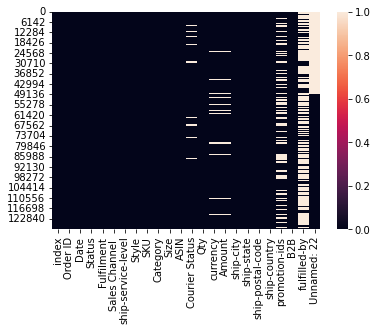

In [14]:
sns.heatmap(df.isnull())
plt.show()

In [15]:
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

In [16]:
(df.isnull().sum()*100/df['index'].count()).round(2)

index                  0.00
Order ID               0.00
Date                   0.00
Status                 0.00
Fulfilment             0.00
Sales Channel          0.00
ship-service-level     0.00
Style                  0.00
SKU                    0.00
Category               0.00
Size                   0.00
ASIN                   0.00
Courier Status         5.33
Qty                    0.00
currency               6.04
Amount                 6.04
ship-city              0.03
ship-state             0.03
ship-postal-code       0.03
ship-country           0.03
promotion-ids         38.11
B2B                    0.00
fulfilled-by          69.55
Unnamed: 22           38.03
dtype: float64

In [156]:
df.columns

Index(['index', 'order_ID', 'date', 'ship_status', 'fullfilment',
       'Sales Channel ', 'service_level', 'style', 'sku', 'product_category',
       'size', 'asin', 'courier_ship_status', 'order_quantity', 'currency',
       'order_amount_($)', 'city', 'state', 'zip', 'ship-country', 'promotion',
       'customer_type', 'fulfilled-by', 'Unnamed: 22', 'month'],
      dtype='object')

In [158]:
# Data Cleaning
# Dropping columns
df.drop(columns=['index', 'Unnamed: 22', 'fulfilled-by', 'ship-country', 'currency', 'Sales Channel '], inplace=True)

In [17]:
# Dropping duplicates
df[df.duplicated(['Order ID','ASIN'], keep=False)]

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
30660,30660,406-0372545-6086735,04-12-22,Cancelled,Amazon,Amazon.in,Expedited,SET197,SET197-KR-NP-L,Set,...,NaN,NaN,Siliguri,WEST BENGAL,734008.0,IN,NaN,False,NaN,NaN
30661,30661,406-0372545-6086735,04-12-22,Cancelled,Amazon,Amazon.in,Expedited,SET197,SET197-KR-NP-L,Set,...,NaN,NaN,Siliguri,WEST BENGAL,734008.0,IN,NaN,False,NaN,NaN
41291,41291,408-0373839-4433120,04-05-22,Cancelled,Amazon,Amazon.in,Expedited,JNE3501,JNE3501-KR-M,kurta,...,NaN,NaN,BENGALURU,KARNATAKA,560072.0,IN,NaN,False,NaN,NaN
41292,41292,408-0373839-4433120,04-05-22,Cancelled,Amazon,Amazon.in,Expedited,JNE3501,JNE3501-KR-M,kurta,...,NaN,NaN,BENGALURU,KARNATAKA,560072.0,IN,NaN,False,NaN,NaN
52330,52330,407-8364731-6449117,05-29-22,Shipped,Amazon,Amazon.in,Expedited,JNE3769,JNE3769-KR-L,kurta,...,NaN,NaN,Theni,TAMIL NADU,625579.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
52333,52333,407-8364731-6449117,05-29-22,Shipped,Amazon,Amazon.in,Expedited,JNE3769,JNE3769-KR-L,kurta,...,INR,487.0,Theni,TAMIL NADU,625579.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
79844,79844,171-9628368-5329958,05-07-22,Cancelled,Amazon,Amazon.in,Expedited,J0329,J0329-KR-L,kurta,...,NaN,NaN,ERNAKULAM,KERALA,682017.0,IN,NaN,False,NaN,False
79845,79845,171-9628368-5329958,05-07-22,Cancelled,Amazon,Amazon.in,Expedited,J0329,J0329-KR-L,kurta,...,NaN,NaN,ERNAKULAM,KERALA,682017.0,IN,NaN,False,NaN,False
85790,85790,171-3249942-2207542,05-03-22,Shipped,Amazon,Amazon.in,Expedited,SET323,SET323-KR-NP-XL,Set,...,INR,939.0,PUNE,MAHARASHTRA,411057.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
85791,85791,171-3249942-2207542,05-03-22,Shipped,Amazon,Amazon.in,Expedited,SET323,SET323-KR-NP-XL,Set,...,INR,939.0,PUNE,MAHARASHTRA,411057.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [18]:
# Count of duplicate Order ID & ASIN (Amazon Standard Identification Number)
len(df)-len(df.drop_duplicates(['Order ID', 'ASIN'])) 

7

In [19]:
df.drop_duplicates(['Order ID','ASIN'], inplace=True, ignore_index=True)

In [20]:
df.head(2)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN


In [21]:
# Filling NaN Values
df.isna().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7792
Amount                 7792
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49150
B2B                       0
fulfilled-by          89691
Unnamed: 22           49048
dtype: int64

In [22]:
df['Status'].value_counts()

Shipped                          77800
Shipped - Delivered to Buyer     28769
Cancelled                        18329
Shipped - Returned to Seller      1953
Shipped - Picked Up                973
Pending                            658
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: Status, dtype: int64

In [23]:
df['Courier Status'].fillna('unknown', inplace=True)

In [24]:
df['promotion-ids'].fillna('no promotion', inplace=True)

When you execute df['Amount'].isna(), you get a Series of boolean values, where True indicates a missing value (NaN) in the 'Amount' column, and False indicates that the value is not missing.

In [25]:
df[df['Amount'].isna()]["Status"].value_counts(normalize=True).apply(lambda x: format(x, '.2%'))

Cancelled                       97.06%
Shipped                          2.67%
Shipped - Delivered to Buyer     0.10%
Shipping                         0.10%
Shipped - Returned to Seller     0.04%
Pending                          0.03%
Name: Status, dtype: object

In [26]:
df['Amount'].fillna(0, inplace=True)

In [27]:
df['ship-city'].fillna('unknown', inplace=True)
df['ship-state'].fillna('unknown', inplace=True)
df['ship-postal-code'].fillna('unknown', inplace=True)

In [28]:
# Renaming columns
mapper={'Order ID':'order_ID', 'Date':'date', 'Status':'ship_status', 'Fulfilment':'fullfilment', 'ship-service-level':'service_level', 'Style':'style','SKU':'sku', 'Category':'product_category','Size':'size', 'ASIN':'asin', 'Courier Status':'courier_ship_status', 'Qty':'order_quantity', 'Amount':'order_amount_($)', 'ship-city':'city', 'ship-state':'state', 'ship-postal-code':'zip', 'promotion-ids':'promotion', 'B2B':'customer_type'}

In [29]:
df.rename(columns=mapper, inplace=True)

In [30]:
df.head(2)

,index,order_ID,date,ship_status,fullfilment,Sales Channel,service_level,style,sku,product_category,...,currency,order_amount_($),city,state,zip,ship-country,promotion,customer_type,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,no promotion,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN


In [31]:
# 1 Indian Rupee equals 0.012 United States Dollar
exchange_rate = 0.012

In [32]:
# Convert amount column values to $
df['order_amount_($)']=df['order_amount_($)'].apply(lambda x: x * exchange_rate)

In [33]:
df.head(2)

,index,order_ID,date,ship_status,fullfilment,Sales Channel,service_level,style,sku,product_category,...,currency,order_amount_($),city,state,zip,ship-country,promotion,customer_type,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,7.77144,MUMBAI,MAHARASHTRA,400081.0,IN,no promotion,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,4.87200,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN


In [34]:
# Convert B2B column values
df['customer_type'].replace(to_replace=[True,False], value=['business','customer'], inplace=True)

In [35]:
# Creating datetime and adding Month column
df['date']=pd.to_datetime(df['date'])

In [36]:
# Filter to only include dates in March
march_dates = df['date'][df['date'].dt.month==3]

In [37]:
# Get the number of unique days in March
march_dates.dt.day.nunique()

1

In [38]:
# Dropping March dates from the dataset
df=df[df['date'].dt.month != 3]

In [66]:
df['month'] = df['date'].dt.month

In [74]:
month_map = {4:'april', 5:'may', 6:'june'}
df['month']=df['month'].map(month_map)

In [76]:
# Define the desired order of months
month_order = ['april', 'may', 'june']
# Convert the month column to a categorical data type with the desired order
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

In [78]:
df['month'].unique()

['april', 'may', 'june']
Categories (3, object): ['april' < 'may' < 'june']

In [96]:
print(F'This dataset contains the months {df["month"].unique()} for 2022')
print(f'The earliest date is {df["date"].min()}')
print(f'The latest date is {df["date"].max()}')

This dataset contains the months ['april', 'may', 'june']
Categories (3, object): ['april' < 'may' < 'june'] for 2022
The earliest date is 2022-04-01 00:00:00
The latest date is 2022-06-29 00:00:00


F or f: Formatted string literals or F-strings provide a convenient and expressive way to format strings in Python, especially when you need to include variables or expressions within the string content.

In [101]:
# Column Value Ordering
# Define the desired order for the size column
size_order = ['Free','XS','S','M','L','XL','XXL','3XL','4XL','5XL','6XL']

# Create an ordered categorical variable for the size column
df['size']=pd.Categorical(df['size'], categories=size_order, ordered=True)

### Data Visualizations

In [105]:
# Checking the clean data

In [117]:
df.describe(include='all', datetime_is_numeric=True)

,index,order_ID,date,ship_status,fullfilment,Sales Channel,service_level,style,sku,product_category,...,order_amount_($),city,state,zip,ship-country,promotion,customer_type,fulfilled-by,Unnamed: 22,month
count,128797.00000,128797,128797,128797,128797,128797,128797,128797,128797,128797,...,128797.000000,128797,128797,128797.0,128764,128797,128797,39254,79920,128797
unique,NaN,120220,NaN,13,2,2,2,1377,7194,9,...,NaN,8953,70,9460.0,1,5784,2,1,1,3
top,NaN,171-5057375-2831560,NaN,Shipped,Amazon,Amazon.in,Expedited,JNE3797,JNE3797-KR-L,Set,...,NaN,BENGALURU,MAHARASHTRA,201301.0,IN,no promotion,customer,Easy Ship,False,april
freq,NaN,12,NaN,77664,89543,128673,88460,4221,772,50206,...,NaN,11200,22235,1004.0,128764,49088,127926,39254,79920,49065
mean,64507.42397,NaN,2022-05-12 13:11:06.099365632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.312705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.00000,NaN,2022-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,32200.00000,NaN,2022-04-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.956000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,64572.00000,NaN,2022-05-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.996480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,96774.00000,NaN,2022-06-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.252000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,128974.00000,NaN,2022-06-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,67.008000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
df.isna().sum()

index                      0
order_ID                   0
date                       0
ship_status                0
fullfilment                0
Sales Channel              0
service_level              0
style                      0
sku                        0
product_category           0
size                       0
asin                       0
courier_ship_status        0
order_quantity             0
currency                7783
order_amount_($)           0
city                       0
state                      0
zip                        0
ship-country              33
promotion                  0
customer_type              0
fulfilled-by           89543
Unnamed: 22            48877
month                      0
dtype: int64

In [159]:
df.isna().sum()

order_ID               0
date                   0
ship_status            0
fullfilment            0
service_level          0
style                  0
sku                    0
product_category       0
size                   0
asin                   0
courier_ship_status    0
order_quantity         0
order_amount_($)       0
city                   0
state                  0
zip                    0
promotion              0
customer_type          0
month                  0
dtype: int64

In [162]:
df.nunique().to_frame(name='Count of unique values')

,Count of unique values
order_ID,120220
date,90
ship_status,13
fullfilment,2
service_level,2
style,1377
sku,7194
product_category,9
size,11
asin,7189


In [165]:
df.apply(pd.unique).to_frame(name='Unique Values')

,Unique Values
order_ID,"[405-8078784-5731545, 171-9198151-1101146, 404..."
date,"[2022-04-30T00:00:00.000000000, 2022-04-29T00:..."
ship_status,"[Cancelled, Shipped - Delivered to Buyer, Ship..."
fullfilment,"[Merchant, Amazon]"
service_level,"[Standard, Expedited]"
style,"[SET389, JNE3781, JNE3371, J0341, JNE3671, SET..."
sku,"[SET389-KR-NP-S, JNE3781-KR-XXXL, JNE3371-KR-X..."
product_category,"[Set, kurta, Western Dress, Top, Ethnic Dress,..."
size,"['S', '3XL', 'XL', 'L', 'XXL', ..., '6XL', 'M'..."
asin,"[B09KXVBD7Z, B09K3WFS32, B07WV4JV4D, B099NRCT7..."


Preliminary Insights

In [258]:
revenue_by_month = df.groupby('month')['order_amount_($)'].sum()
percentage_decrease_apr_to_may = (revenue_by_month['april'] - revenue_by_month['may'])/revenue_by_month['april']*100
percentage_decrease_may_to_june = (revenue_by_month['may']-revenue_by_month['june'])/revenue_by_month['may']*100
total_decrease = (revenue_by_month['april']-revenue_by_month['june'])/revenue_by_month['april']*100
print("\n")
print(f'Total revenue for April 2022: ${revenue_by_month["april"]:,.2f}')
print(f'Total revenue for May 2022: ${revenue_by_month["may"]:,.2f}, which is a -{percentage_decrease_apr_to_may:.2f}% decrease from April')
print(f'Total revenue for June 2022: ${revenue_by_month["june"]:,.2f}, which is a -{percentage_decrease_may_to_june:.2f}% decrease from May')
print(f'Total revenue for Q2 2022 decreased by -{total_decrease:.2f}%')
print("\n")

revenue_by_category = df.groupby('product_category')['order_amount_($)'].sum().round(2).sort_values(ascending=False)
print(f'Total revenue by product category: {revenue_by_category}')
print(revenue_by_category.apply(lambda x: "${:,.2f}".format(x)))
print("\n")

avg_price_by_category = df.groupby('product_category')['order_amount_($)'].mean()
avg_price_by_category = avg_price_by_category.sort_values(ascending=False)
print("Top 5 product categories by average price:")
print(avg_price_by_category.head(5))
print("\n")

cancelled_orders = df[df['ship_status'].isin(['Cancelled','Shipped - Lost in Transit'])]
returned_orders = df[df['ship_status'].isin(['Shipped - Returned to Seller', 'Shipped - Returning to Seller', 'Shipped - Rejected by Buyer', 'Shipped - Damaged'])]
total_cancelled = len(cancelled_orders)
total_returned = len(returned_orders)
total_cancelled_returned = total_cancelled + total_returned
percent_cancelled = total_cancelled/len(df)*100
percent_returned = total_returned/len(df)*100
percent_cancelled_returned = total_cancelled_returned / df['order_quantity'].sum() * 100
print(f'Total cancelled orders: {total_cancelled}, which is {percent_cancelled:.2f}% of all orders.')
print(f'Total returned orders: {total_returned}, which is {percent_returned:.2f}% of all orders.')
print(f'This represents {percent_cancelled_returned:.2f}% of all orders.')
print("\n")
popular_category_by_state = df.groupby(['state','product_category'])['order_quantity'].sum().reset_index()
popular_category_by_state = popular_category_by_state.sort_values(['state','order_quantity'], ascending=[True, False])
popular_category_by_state = popular_category_by_state.drop_duplicates(subset=['state'])
print("Most popular product category in each state:")
print(popular_category_by_state)
print("\n")

avg_order_amount_by_customer_type = df.groupby('customer_type')['order_amount_($)'].mean()
print("Average order amount by customer type:")
print(avg_order_amount_by_customer_type.apply(lambda x: "${:,.2f}".format(x)))



Total revenue for April 2022: $346,064.50
Total revenue for May 2022: $314,694.21, which is a -9.06% decrease from April
Total revenue for June 2022: $281,095.76, which is a -10.68% decrease from May
Total revenue for Q2 2022 decreased by -18.77%


Total revenue by product category: product_category
Set              469777.66
kurta            255171.24
Western Dress    134501.03
Top               64119.38
Ethnic Dress       9481.42
Blouse             5497.54
Bottom             1808.02
Saree              1487.21
Dupatta              10.98
Name: order_amount_($), dtype: float64
product_category
Set              $469,777.66
kurta            $255,171.24
Western Dress    $134,501.03
Top               $64,119.38
Ethnic Dress       $9,481.42
Blouse             $5,497.54
Bottom             $1,808.02
Saree              $1,487.21
Dupatta               $10.98
Name: order_amount_($), dtype: object


Top 5 product categories by average price:
product_category
Set              9.357002
Saree      

Visualizations

In [ ]:
import matplotlib.pyplot

In [313]:
# Monthly Sales
monthly_sales = df.groupby('month')['order_amount_($)'].sum().tail(3)
# Latest month revenue
latest_month_revenue = monthly_sales.tail(1)
# Avg_quarterly_revenue
avg_quarterly_revenue = monthly_sales.tail(3).head(3).mean()

In [341]:
# Average order value
df.groupby('month')['order_amount_($)'].sum()

month
april    346064.49984
may      314694.21300
june     281095.75656
Name: order_amount_($), dtype: float64

In [349]:
df.groupby('month').agg({'order_amount_($)':'sum','order_ID':'nunique'}).reset_index()

,month,order_amount_($),order_ID
0,april,346064.49984,45858
1,may,314694.21300,39221
2,june,281095.75656,35141
